# Generating a Choroplete Map with Geopandas and Mapclassify

In [16]:
import geopandas as gpd 
import matplotlib.pyplot as plt
import mapclassify
import numpy as np
import pandas as pd

In [17]:
# Reading the state administrative boundary from the shapefile
map_state = gpd.read_file(r"C:\Users\tyaji\Documents\Project Folder\bay\Shapefiles\nga_admbnda_adm1_osgof_20190417.shp")

<Axes: >

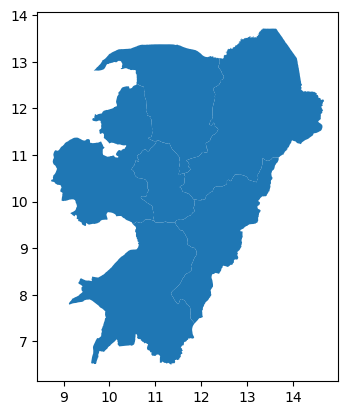

In [27]:
# Preview what your map looks like with no data in it 
bay_state.plot()

In [18]:
# Reading the lga administrative boundary from the shapefile
map_lga = gpd.read_file(r"C:\Users\tyaji\Documents\Project Folder\bay\Shapefiles\nga_admbnda_adm2_osgof_20190417.shp")

<Axes: >

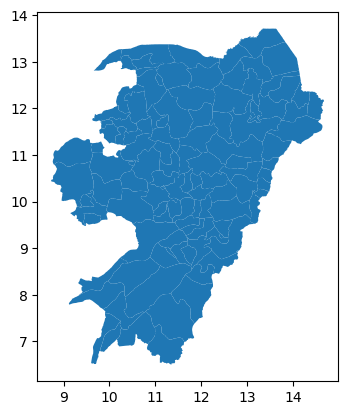

In [28]:
# Preview what your map looks like with no data in it 
bay_lga.plot()

In [19]:
#Creating a new variable for the lga administrative boundary 
map_df = map_lga

In [20]:
# Now we filter just the states of interest from the lga administrative boundary 
state_list = ['Borno','Yobe','Adamawa', 'Bauchi','Taraba', 'Gombe']
bay_lga = map_df[map_df['ADM1_EN'].isin(state_list)] # apply filter 

In [21]:
bay_lga = map_lga[
    (map_lga['ADM1_EN']=='Borno')|
    (map_lga['ADM1_EN']=='Adamawa')|
    (map_lga['ADM1_EN']=='Yobe')|
    (map_lga['ADM1_EN']=='Taraba')|
    (map_lga['ADM1_EN']=='Bauchi')|
    (map_lga['ADM1_EN']=='Gombe')
]
bay_lga.head()

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,SD_EN,SD_PCODE,geometry
2,3.075316,0.326868,Abadam,NG008001,Abadam,None,None,Borno,NG008,Nigeria,NG,2016-11-29,2019-04-17,None,Borno North,NG00802,"POLYGON ((13.83477 13.42336, 13.81909 13.42175..."
35,2.663498,0.202308,Akko,NG016001,Akko,None,None,Gombe,NG016,Nigeria,NG,2016-11-29,2019-04-17,None,Gombe Central,NG01601,"POLYGON ((10.88516 10.39865, 10.88472 10.39743..."
49,3.421109,0.495845,Alkaleri,NG005001,Alkaleri,None,None,Bauchi,NG005,Nigeria,NG,2016-11-29,2019-04-17,None,Bauchi South,NG00503,"POLYGON ((10.83143 10.19845, 10.83029 10.19692..."
62,1.817347,0.185598,Ardo-Kola,NG035001,Ardo-Kola,None,None,Taraba,NG035,Nigeria,NG,2016-11-29,2019-04-17,None,Taraba North,NG03502,"POLYGON ((11.21835 9.01566, 11.22195 9.00770, ..."
68,2.713605,0.206528,Askira/Uba,NG008002,Askira/Uba,None,None,Borno,NG008,Nigeria,NG,2016-11-29,2019-04-17,None,Borno South,NG00803,"POLYGON ((13.33622 10.85456, 13.33622 10.85441..."


In [22]:
# We do same for the state boundaries 
bay_state = map_state[
    (map_state['ADM1_EN']=='Borno')|
    (map_state['ADM1_EN']=='Adamawa')|
    (map_state['ADM1_EN']=='Yobe')|
    (map_state['ADM1_EN']=='Taraba')|
    (map_state['ADM1_EN']=='Bauchi')|
    (map_state['ADM1_EN']=='Gombe')
]
bay_state.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
1,11.525443,3.113007,Adamawa,NG002,Adamawa,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((13.62129 10.94823, 13.62592 10.94822..."
4,13.952005,4.011018,Bauchi,NG005,Bauchi,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((10.75125 12.46148, 10.75615 12.39191..."
7,13.714364,5.987849,Borno,NG008,Borno,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((13.35885 13.71261, 13.36207 13.71153..."
15,5.955286,1.438747,Gombe,NG016,Gombe,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((11.07149 11.31249, 11.07479 11.31080..."
34,13.696255,4.802474,Taraba,NG035,Taraba,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,"POLYGON ((10.83822 9.61847, 10.84855 9.61720, ..."


In [23]:
# Reading the excel file 
df = pd.read_excel(r"C:\Users\tyaji\Documents\Project Folder\bay\data_map.xlsx")

In [24]:
# Select required information from the dataframe
df = df.iloc[1:, :]

In [25]:
# Merge geodataframe with excel file
merged_df = bay_lga.merge(df, how='left', left_on='ADM2_PCODE', 
                         right_on='LGA Pcode')

In [33]:
#Get values of the classes for the scheme
q5 = mapclassify.Quantiles(merged_df['Number of Individuals'], k=5)
q5

Quantiles

      Interval         Count
----------------------------
[     nan,   223.60] |   152
(  223.60,   598.20] |    76
(  598.20,  2549.00] |    75
( 2549.00, 36060.80] |    76
(36060.80,      nan] |     0

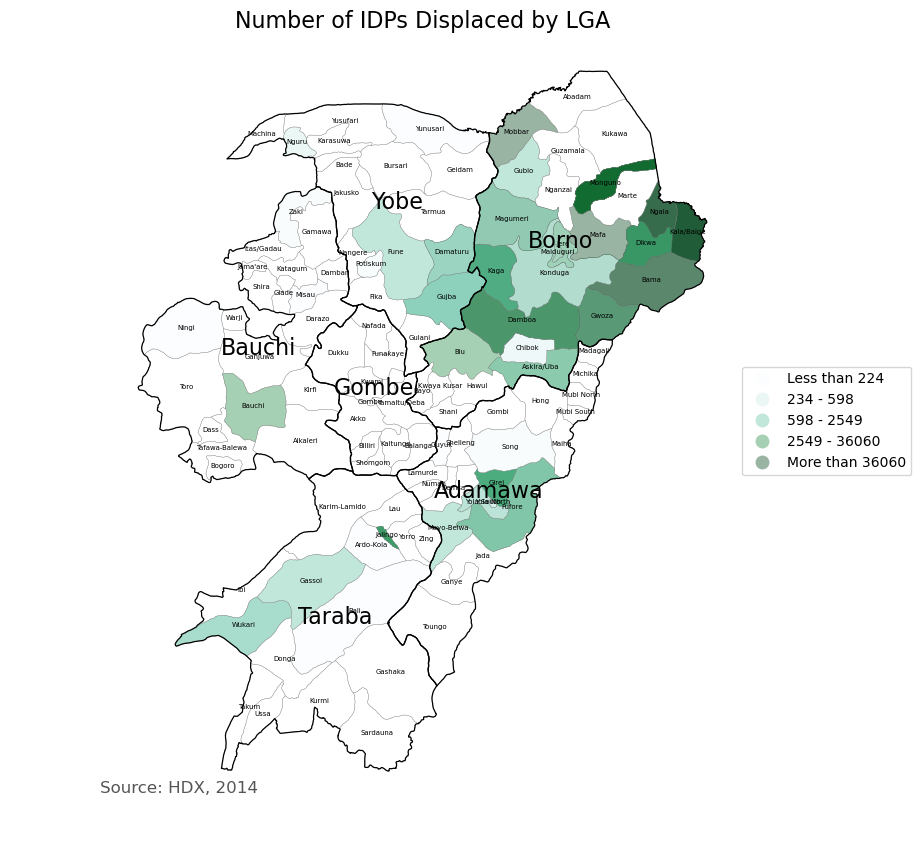

In [35]:
# Plot the map
ax=merged_df.plot(
                figsize=(10,10),
                column='Number of Individuals',
                cmap='BuGn', 
                alpha = 0.4,
                linewidth=0.5,  
                k = 5, # Number of class for legend
                legend = True,
                # legend_kwds={'label': 'Population by Country', 'orientation': 'vertical'},
                scheme='quantiles',# BoxPlot
                # missing_kwds={'color': 'lightgrey',
                #               'edgecolor': 'red',
                #               'hatch': '///',
                #               'label': 'Missing values',},
                # categorical= False, # reflects numerical values 
                legend_kwds=dict(
                    loc = 'center left', 
                    # 'upper right', 'upper left', 
                    # 'lower left', 'lower right', 
                    # 'right', 'center left', 'center right', 
                    # 'lower center', 'upper center', 'center'
                    bbox_to_anchor=(1,0.5),
                       fmt='{:.0f}',
                       labels=['Less than 224', '234 - 598','598 - 2549', '2549 - 36060',
                               'More than 36060']), # customize legend based on intervals from quantiles            
                )

# Get value range of the labels 
labels = [t.get_text() for t in ax.get_legend().get_texts()]



#Create boundaries around the plotted map
bay_lga.boundary.plot(ax=ax, edgecolor='gray', linewidth=0.2)
bay_state.boundary.plot(ax=ax, edgecolor='black', linewidth=0.9)


# Customize the map
# remove the axis
ax.axis('off')


# add a title
ax.set_title('Number of IDPs Displaced by LGA', fontdict={'fontsize': '16', 
                                                          'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: HDX, 2014',xy=(0.1, .08),  xycoords= 'figure fraction', 
            horizontalalignment='left', verticalalignment='top',fontsize = '12', 
            fontweight = '3',
            color= '#555555')

# Adding lga labels to the map
bay_lga.apply(lambda x: ax.annotate(text=x['ADM2_EN'],
                                   xy=x.geometry.centroid.coords[0], 
                                   ha='center', fontsize=5), axis=1)

# Adding state labels to the map
bay_state.apply(lambda x: ax.annotate(text=x['ADM1_EN'],
                                   xy=x.geometry.centroid.coords[0], 
                                   ha='center', fontsize=16), axis=1)

# Save Map
plt.savefig('map_export.png', dpi=300)
